## Conditional Probability

This lab is an introduction to conditional probabilities.  

In [50]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.graph_objs as go
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
import otter
grader = otter.Notebook()

# 1. What is conditional probability good for?

Suppose we have a known population, like all dogs in California.  So far, we've seen 3 ways of *predicting* something about an individual in that population, given incomplete knowledge about the identity of the individual:

* If we know nothing about the individual dog, we could predict that its speed is the *average* or *median* of all the speeds in the population.
* If we know the dog's height but not its speed, we could use *linear regression* to predict its speed from its height.  The resulting prediction is still imperfect, but it might be more accurate than the population average.
* If we know the dog's breed, height, and age, we could use *nearest-neighbor classification* (or *multiple regression*) to predict its speed by comparing it to a collection of dogs with known speed.


We can also compute conditional probabilities to make predictions about individuals or events. This technique is different from the previous methods we’ve examined because 

1. our prediction for each outcome is described by a probability, and 
2. each probability can be exactly calculated from assumptions, as opposed to estimated from data.

# 2. Icon arrays
Parts 3 and 4 of this lab work with a more complex example about disease, but first, let's start with a simple example.

Imagine you are a marble.  You don't know what you look like (since you obviously have no eyes), but you know that Samantha drew you **uniformly at random** from a bag that contained the following marbles:
* 4 large shiny marbles,
* 1 large dull marble,
* 6 small shiny marbles, and
* 2 small dull marbles.

**Question 2.0.1.** Knowing only what we've told you so far, what's the probability that you're a large shiny marble?

<!--
BEGIN QUESTION
name: q2_0_1
-->

In [51]:
probability_large_shiny = 4/13

In [52]:
grader.check("q2_0_1")

q2_0_1 results: All test cases passed!

Here's a table with those marbles:

In [53]:
marbles = pd.read_csv("marbles.csv")
marbles

,surface,size
0,shiny,large
1,shiny,large
2,shiny,large
3,shiny,large
4,dull,large
5,shiny,small
6,shiny,small
7,shiny,small
8,shiny,small
9,shiny,small


Here are the counts of each type of marble as a multi-index Series.

In [54]:
marble_counts = marbles.groupby('surface')["size"].value_counts()
marble_counts

surface  size 
dull     small    2
         large    1
shiny    small    6
         large    4
Name: size, dtype: int64

We've included some code to display our marbles as an *icon array*.  The code in the cell below formats a single-index Series from our data to use in the our graph. It uses a loop to concatenate separate index labels together into a single index. Each type of marble appears in its own row, with its respective count. 

In [55]:
# Combine the multiple indices (surface and size) into a single index
marble_names = []
for i in range(len(marble_counts)):
    marble_names.append(marble_counts.index[i][0] + " " + marble_counts.index[i][1])

# Zip together our counts and marble types into a single object, convert it to a dictionary, 
# and then convert that to a Series
df = pd.Series(dict(zip(marble_names, marble_counts)))
df

dull small     2
dull large     1
shiny small    6
shiny large    4
dtype: int64

The code in the cell below creates an icon array from the marble counts. Each icon represents one marble with its respective features encoded. Don't worry if you don't understand the code, just run the cell. And note that the axes labels are th

Here are all the different combinations of surface and size, with the count for each surface-size combination. Each icon represents a single marble.


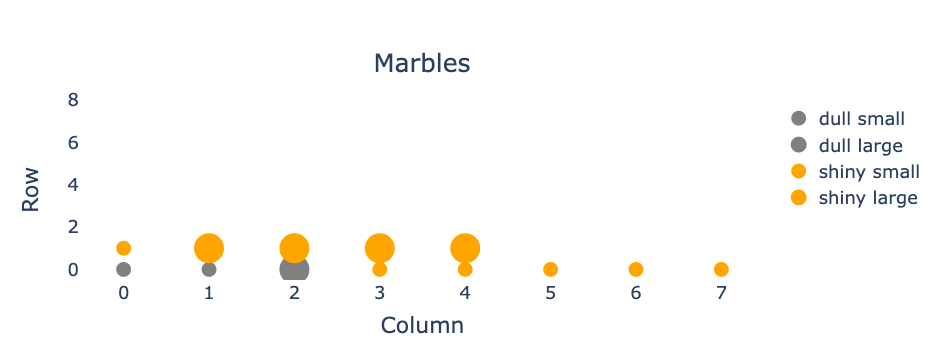

In [56]:
num_rows = 8
row = 0
column = 0
data = []
colors_list = ['grey', 'grey', 'orange', 'orange']
colors = {df.index[i]:colors_list[i] for i in range(len(df))}
size_list = [15,30,15,30]
sizes = {df.index[i]:size_list[i] for i in range(len(df))}

for category, count in df.iteritems():
    rows = []
    columns = []
    for _ in range(count):
        if row == num_rows:
            row = 0
            column = column + 1
        rows.append(row)
        columns.append(column)        
        row += 1
    data.append(go.Scatter(x=rows, y=columns, mode='markers', 
                           marker={'color': colors[category], 'size': sizes[category]},
                           name=category))
fig = go.Figure(dict(data=data, layout=go.Layout(plot_bgcolor='white',
                                                 xaxis=dict(visible=True), 
                                                 yaxis=dict(visible=True))))
fig.update_layout(yaxis_range=[-0.5,8])
fig.update_layout(title='Marbles', xaxis_title = "Column", yaxis_title = "Row",
                  title_x=0.45, title_y=0.85, font=dict(size=18))
fig.show()

Knowing nothing else about yourself, you're equally likely to be any of the marbles pictured.

**Question 2.0.2.** What's the probability that you're a shiny marble?  Calculate this by hand (using Python for arithmetic) by looking at your icon array.

<!--
BEGIN QUESTION
name: q2_0_2
-->

In [57]:
probability_shiny = 10/13

In [58]:
grader.check("q2_0_2")

q2_0_2 results: All test cases passed!

## 2.1. Conditional probability

Suppose you overhear Samantha say that you're a large marble. Does this somehow change the chance that you're shiny?  Let's find out.

Go back to the full icon array, displayed above.

In question 2.0.2, we assumed you were equally likely to be any of the marbles, because we didn't know any better.  That's why we looked at all the marbles to compute the probability that you were shiny.

But assuming that you're a large marble, we can eliminate some of these possibilities.  In particular, you can't be a small shiny marble or a small dull marble.

You're still equally likely to be any of the remaining marbles, because you don't know any other information.

**Question 2.1.1.** What's the probability you're a shiny marble, knowing that you're a large marble? 


<!--
BEGIN QUESTION
name: q2_1_1
-->

In [59]:
probability_shiny_given_large = 4/5

In [60]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

You should have found that this is different from the probability that you're a shiny marble given no size information) which you computed earlier.  The distribution of surfaces among the large marbles is a little different from the distribution of surfaces among all the marbles.

**Question 2.1.2.** Suppose instead Samantha had said you're a **shiny** marble (hooray!). What's the probability that you're large? 

<!--
BEGIN QUESTION
name: q2_1_2
-->

In [61]:
# Now fill in the answer.
probability_large_given_shiny = 4/10

In [62]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

**Question 2.1.3.** Can you answer the previous two questions just by looking at the full icon array?

If you can, how? If not, why not? Check with your lab peers to see if you are on the right track. 

<!--
BEGIN QUESTION
name: q2_1_3
-->

Yes, you can look at the sizes and colour of the points and see how many fit a given criteria out of the total points. You can even just look at a portion of the points, such as the large points to find the probability you are also shiny given you are a large point.

# 3. Cancer screening

### Background
Medical tests are an important but surprisingly controversial topic.  For years, women have been advised to get regular mammograms, which test for breast cancer.  Today, there is controversy over whether the tests are useful at all.

Part of the problem with such tests is that they are not perfectly reliable.  Someone without cancer, or with only a benign form of cancer, can see a positive result on a test for cancer.  Someone with cancer can receive a negative result.  ("Positive" means "pointing toward cancer," so in this context it's bad!)  Doctors and patients often deal poorly with the first case, called *false positives*.  For example, a patient may receive dangerous treatment like chemotherapy or radiation despite having no cancer or, as happens more frequently, having a cancer that would not have impacted their health.

Conditional probability is a good way to think about such situations.  For example, you can compute the chance that you have cancer **given the results of a diagnostic test** by combining information from different probability distributions.  You'll see that the chance you have cancer can be far from 100% even if you have a positive test result from a test that is usually accurate.

## 3.1. Basic cancer statistics
Suppose that in a representative group of 10,000 people who are tested for cancer ("representative" meaning that the frequencies of different events are the same as the frequencies in the whole population):
1. 100 people have cancer.
2. Among the 100 people that have cancer, 90 have positive results on a cancer test and 10 have negative results.  ("Negative" means "not pointing toward cancer.")
3. The other 9,900 people don't have cancer.
4. Among these 9,900 people, 198 have positive results on a cancer test and the other 9,702 have negative results.  (So 198 see "false positive" results.)

Below we've generated a table with data from these 10,000 hypothetical people.

In [63]:
people = pd.DataFrame({
    "cancer status": ["sick", "sick", "healthy", "healthy"],
    "test status": ["positive", "negative", "positive", "negative"],
    "count": [90, 10, 198, 9702]})
people

,cancer status,test status,count
0,sick,positive,90
1,sick,negative,10
2,healthy,positive,198
3,healthy,negative,9702


One way to visualize this dataset is with a contingency table, which you've seen before.

**Question 3.1.1.** Create a contingency table that looks like this:

|cancer status|negative|positive|
|-|-|-|
|healthy|||
|sick||||

...with the **count** of each group filled in, according to what we've told you above.  The counts in the 4 boxes should sum to 10,000.

*Hint:* One possible way to do this would be to use `pivot_table`


In [64]:
cancer = pd.pivot_table(people, index='cancer status', columns='test status', values='count').reset_index()
cancer

test status,cancer status,negative,positive
0,healthy,9702,198
1,sick,10,90


Now let's think about how you can use this kind of information when you're tested for cancer.

Before you know any information about yourself, you could imagine yourself as a **uniform random sample** of one of the 10,000 people in this imaginary population of people who have been tested.

What's the chance that you have cancer, knowing nothing else about yourself?  It's $\frac{100}{10000}$, or 1%.

**Question 3.1.2.** What's the chance that you have a positive test result, knowing nothing else about yourself? Assign `probability_positive_test` to this value.
<!--
BEGIN QUESTION
name: q3_1_2
-->

In [65]:
# Here is is a frequency table to help
people_counts = people.groupby(['cancer status', 'test status'])["count"].sum()
people_counts

cancer status  test status
healthy        negative       9702
               positive        198
sick           negative         10
               positive         90
Name: count, dtype: int64

In [78]:
# Now fill in the probability of a positive test result
is_positive = people_counts[1] + people_counts[3]
probability_positive_test = is_positive *1/10000

In [79]:
probability_positive_test

0.0288

In [67]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

## 3.2. Interpreting test results
Suppose you have a positive test result.  This means that you can now narrow yourself down to being part of just one of the two following groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

The *conditional probability* that you **have cancer given your positive test result** is the chance that you're in the first group (cancer), assuming you have a positive test result.

**Question 3.2.1.** The conditional probability that you have cancer **given your positive test result** is closest to:

1. 9/10

2. 2/3

3. 1/2

4. 1/3

5. 1/100

Assign `rough_prob_sick_given_positive` to the number corresponding to your answer.

<!--
BEGIN QUESTION
name: q3_2_1
-->

In [68]:
# Set this to one of the probabilities above.
rough_prob_sick_given_positive = 4

In [69]:
grader.check("q3_2_1")

q3_2_1 results: All test cases passed!

**Question 3.2.2.** Now write code to calculate that probability exactly, using the original contingency table you wrote (the `cancer` table).

Run the next code cell to see the `cancer` table, then fill in `prob_sick_given_positive` with your code.

<!--
BEGIN QUESTION
name: q3_2_2
-->

In [80]:
prob_sick_given_positive = cancer['positive'][1]/np.sum(cancer['positive']) # num sick given pos / total pos
prob_sick_given_positive

# Run this cell first to see the cancer table. Then fill in the first line of this cell.
print(cancer)

print('Probability of cancer given positive test result: {}'.format(prob_sick_given_positive))

test status cancer status  negative  positive
0                 healthy      9702       198
1                    sick        10        90
Probability of cancer given positive test result: 0.3125


In [71]:
grader.check("q3_2_2")

q3_2_2 results: All test cases passed!

**Question 3.2.3.** Is your answer to question 3.2.2 bigger than the overall proportion of people in the population who have cancer (given as 1% in 3.1.1)?  Does that make sense? Check with your peers in lab to see if you have the right idea. 

<!--
BEGIN QUESTION
name: q3_2_3
-->

It makes sense that people that have cancer are more likely to also be sick (3% chance) opposed to people that don't have cancer only having a 1% chance of being sick.

# 4. Tree diagrams
A tree diagram is another useful visualization that helps us calculate conditional probabilities.  It is easiest to draw a tree diagram when the probabilities are presented in a slightly different way - specifically, we first look at the probabilities of cancer in the entire population, and then examine the rates of positive test results within the cancer and no cancer groups.  For example, people often summarize the information in your `cancer` table using 3 numbers:

1. The overall probability of having cancer is **`p_cancer`**.  (This is called the *base rate* or *marginal probability* of the disease.)
2. Given that you have cancer, the probability of a positive test result is **`p_pos_given_cancer`**.  (This is called the *sensitivity* of the test.  Higher values of `p_pos_given_cancer` mean the test is more useful.)
3. Given that you don't have cancer, the probability of a positive test result is **`p_pos_given_nocancer`**.  (This is called the *false positive rate* of the test.  Higher values of `p_pos_given_nocancer` mean the test is less useful.)

You already saw that the base rate of cancer was .01 in the previous section.  `p_pos_given_cancer` and `p_pos_given_nocancer` can be computed using the same method you used to compute the conditional probability of cancer given a positive test result.

The information we have on cancer can be represented in this tree diagram:

                      /    \
                 .99 /      \ .01
                    /        \ 
                   /          \
              no cancer      cancer
                / \            / \
           0.1 /   \ 0.9  0.98/   \ 0.02
              /     \        /     \
             +       -      +       -
             
**Question 4.1.** Compute `p_pos_given_cancer` and `p_pos_given_nocancer` for the data in section 3.  

*Hint:* Use Bayes' Rule. For your reference, chapter 18.1 of the textbook has a section on [tree diagrams](https://www.inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html#tree-diagram) and [Bayes' Rule](https://www.inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html#bayes-rule).

<!--
BEGIN QUESTION
name: q4_1
-->

In [72]:
has_cancer = cancer[cancer["cancer status"] == "sick"]
no_cancer = cancer[cancer["cancer status"] == "healthy"]

float(has_cancer["positive"].to_numpy())/100

0.9

In [73]:
has_cancer["positive"]

1    90
Name: positive, dtype: int64

In [74]:
# Hint: You may find these two tables useful:
has_cancer = cancer[cancer["cancer status"] == "sick"]
no_cancer = cancer[cancer["cancer status"] == "healthy"]

p_cancer = .01
p_pos_given_cancer = float(has_cancer["positive"].to_numpy()) / (float(has_cancer["positive"].to_numpy()) + float(has_cancer["negative"].to_numpy()))
p_pos_given_nocancer = float(no_cancer["positive"].to_numpy()) / (float(no_cancer["positive"].to_numpy()) + float(no_cancer["negative"].to_numpy()))

print('Probability of Cancer:', p_cancer, '\nProbability of a positive test given cancer:', p_pos_given_cancer, 
      '\nProbability of a positive test given no cancer:', p_pos_given_nocancer)

Probability of Cancer: 0.01 
Probability of a positive test given cancer: 0.9 
Probability of a positive test given no cancer: 0.02


In [76]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** What is the difference in assumptions between the first probability in question 4.1 (probability of a positive test given cancer) and the one in question 3.2.2 (probability of cancer given a positive test result)?

What kind of information does each probability tell us?

<!--
BEGIN QUESTION
name: q4_2
-->

You have a 90% chance of getting a positive test given that you have cancer (4.1) opposed to a 31.25% chance of having cancer given a positive test.

In [81]:
grader.check_all()

q2_0_1 results: All test cases passed!

q2_0_2 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q3_1_2 results: All test cases passed!

q3_2_1 results: All test cases passed!

q3_2_2 results: All test cases passed!

q4_1 results: All test cases passed!

That's it! You've completed Lab 15. Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the Lab 15 assignment in **Canvas** by 11:59pm on the due date.